<a href="https://colab.research.google.com/github/lightituphome/TAX-Random-Forest-/blob/main/TAX(Random_Forest_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
files.upload()

Saving Tax.csv to Tax.csv


{'Tax.csv': b',HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty\r\n1,49685,227187,0,0,105,0,1,1,1,Democrat\r\n2,64756,-507342,2,3,68,3,1,0,0,Independent\r\n3,115435,521290,1,3,81,2,0,1,0,Republican\r\n4,99454,251829,2,1,52,4,1,0,0,Republican\r\n5,157274,-472337,0,1,28,1,1,0,1,Independent\r\n6,235312,807659,2,2,45,0,1,0,0,Democrat\r\n7,158461,590203,2,0,74,0,0,1,0,Republican\r\n8,205734,416788,2,0,84,5,0,1,1,Democrat\r\n9,238581,812542,2,3,18,2,1,0,0,Republican\r\n10,214597,-193805,2,1,66,5,1,0,0,Democrat\r\n11,223819,243373,2,1,34,0,0,0,0,Democrat\r\n12,256348,-376906,0,2,47,1,1,0,1,Independent\r\n13,145298,-287587,0,3,62,1,1,0,1,Republican\r\n14,225764,735274,2,4,72,4,1,0,1,Independent\r\n15,251149,-48468,0,1,87,3,0,1,0,Republican\r\n16,215804,196355,1,3,28,4,0,1,1,Republican\r\n17,253274,-633752,2,1,94,3,0,1,1,Republican\r\n18,98778,949616,0,4,60,3,1,0,0,Republican\r\n19,180631,-110700,1,2,68,3,0,0,0,Democrat\r\n20,212796,709226,1,2,57

In [ ]:
tax=pd.read_csv('Tax.csv')

In [ ]:
tax

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,1,49685,227187,0,0,105,0,1,1,1,Democrat
1,2,64756,-507342,2,3,68,3,1,0,0,Independent
2,3,115435,521290,1,3,81,2,0,1,0,Republican
3,4,99454,251829,2,1,52,4,1,0,0,Republican
4,5,157274,-472337,0,1,28,1,1,0,1,Independent
...,...,...,...,...,...,...,...,...,...,...,...
999,1000,37626,20830,0,1,38,4,0,1,0,Democrat
1000,1001,79765,63483,2,1,71,5,0,1,0,Republican
1001,1002,111219,-573449,0,4,35,2,0,0,0,Republican
1002,1003,105591,-611207,0,1,59,1,1,1,0,Republican


In [ ]:
tax.shape

(1004, 11)

In [ ]:
tax.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,1,49685,227187,0,0,105,0,1,1,1,Democrat
1,2,64756,-507342,2,3,68,3,1,0,0,Independent
2,3,115435,521290,1,3,81,2,0,1,0,Republican
3,4,99454,251829,2,1,52,4,1,0,0,Republican
4,5,157274,-472337,0,1,28,1,1,0,1,Independent


In [ ]:
tax.tail()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
999,1000,37626,20830,0,1,38,4,0,1,0,Democrat
1000,1001,79765,63483,2,1,71,5,0,1,0,Republican
1001,1002,111219,-573449,0,4,35,2,0,0,0,Republican
1002,1003,105591,-611207,0,1,59,1,1,1,0,Republican
1003,1004,201463,310275,1,3,58,5,1,0,1,Republican


In [ ]:
tax.isnull().sum()

Unnamed: 0        0
HHI               0
HHDL              0
Married           0
CollegGrads       0
AHHAge            0
Cars              0
Filed in 2017     0
Filed in 2016     0
Filed in 2015     0
PoliticalParty    0
dtype: int64

In [ ]:
tax.replace({'PoliticalParty':{'Independent':0,'Democrat':1,'Republican':2}},inplace=True)

In [ ]:
tax

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,1,49685,227187,0,0,105,0,1,1,1,1
1,2,64756,-507342,2,3,68,3,1,0,0,0
2,3,115435,521290,1,3,81,2,0,1,0,2
3,4,99454,251829,2,1,52,4,1,0,0,2
4,5,157274,-472337,0,1,28,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
999,1000,37626,20830,0,1,38,4,0,1,0,1
1000,1001,79765,63483,2,1,71,5,0,1,0,2
1001,1002,111219,-573449,0,4,35,2,0,0,0,2
1002,1003,105591,-611207,0,1,59,1,1,1,0,2


Data Analysis and Visualisation

In [ ]:
tax.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.00000,1004.000000
mean,502.500000,153524.522908,-6666.766932,0.970120,2.595618,60.577689,2.447211,0.507968,0.512948,0.50996,0.994024
std,289.974137,86167.778113,593751.687936,0.806939,1.687388,24.847991,1.701621,0.500186,0.500081,0.50015,0.816068
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,251.750000,82788.500000,-514295.500000,0.000000,1.000000,39.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,502.500000,153788.500000,-11331.500000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.00000,1.000000
75%,753.250000,228034.000000,526141.250000,2.000000,4.000000,81.000000,4.000000,1.000000,1.000000,1.00000,2.000000
max,1004.000000,299700.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.00000,2.000000


<Axes: xlabel='PoliticalParty', ylabel='count'>

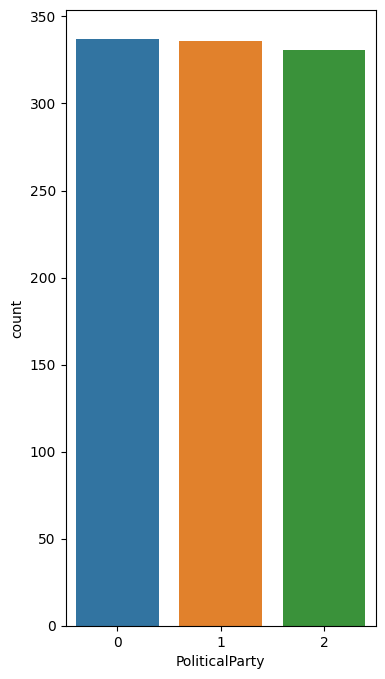

In [ ]:
plot=plt.figure(figsize=(4,8))
sns.countplot(x='PoliticalParty',data=tax)

Correlation

In [ ]:
correlation=tax.corr()

<Axes: >

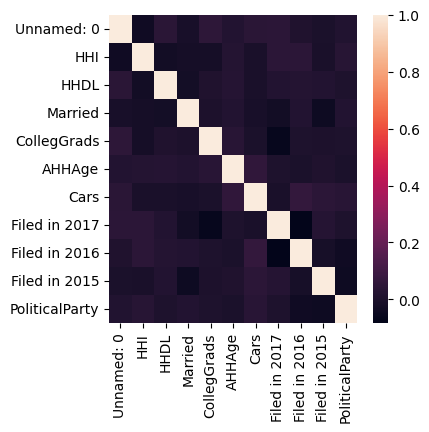

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(tax.corr())

Data Preprocessing

In [ ]:
x=tax.drop('PoliticalParty',axis=1)
y=tax['PoliticalParty']

In [ ]:
print(x)

      Unnamed: 0     HHI    HHDL  Married  CollegGrads  AHHAge  Cars  \
0              1   49685  227187        0            0     105     0   
1              2   64756 -507342        2            3      68     3   
2              3  115435  521290        1            3      81     2   
3              4   99454  251829        2            1      52     4   
4              5  157274 -472337        0            1      28     1   
...          ...     ...     ...      ...          ...     ...   ...   
999         1000   37626   20830        0            1      38     4   
1000        1001   79765   63483        2            1      71     5   
1001        1002  111219 -573449        0            4      35     2   
1002        1003  105591 -611207        0            1      59     1   
1003        1004  201463  310275        1            3      58     5   

      Filed in 2017  Filed in 2016  Filed in 2015  
0                 1              1              1  
1                 1            

In [ ]:
print(y)

0       1
1       0
2       2
3       2
4       0
       ..
999     1
1000    2
1001    2
1002    2
1003    2
Name: PoliticalParty, Length: 1004, dtype: int64


train and test split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1004, 10) (803, 10) (201, 10)


In [ ]:
print(x_train)

     Unnamed: 0     HHI    HHDL  Married  CollegGrads  AHHAge  Cars  \
839         840  150620   -5404        1            1      52     3   
114         115  290799  116498        2            0      18     2   
914         915  151963   77843        1            1      31     2   
444         445  255838  958443        1            2      75     0   
733         734  285512  467218        2            0      25     2   
..          ...     ...     ...      ...          ...     ...   ...   
401         402   17175 -292961        0            5      92     4   
206         207  254469 -224440        0            5      91     5   
691         692  129846  736629        0            4     101     4   
455         456   75082  853800        0            4      20     1   
471         472  219152  441277        1            1      85     0   

     Filed in 2017  Filed in 2016  Filed in 2015  
839              1              0              1  
114              0              0            

In [ ]:
print(y_train)

839    2
114    2
914    2
444    2
733    2
      ..
401    0
206    1
691    0
455    1
471    1
Name: PoliticalParty, Length: 803, dtype: int64


Model Training

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()

Model Evaluaation

In [ ]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [ ]:
print('accuracy on training data:',training_data_accuracy)

accuracy on training data: 1.0


In [ ]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [ ]:
print('accuracy on testing data:',test_data_accuracy)

accuracy on testing data: 0.39303482587064675


Building a predictive system

In [ ]:
input_data=(18,98778,949616,0,4,60,3,1,0,0)
input_data_as_numpy_array=np.array(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
if(prediction[0]==0):
  print("The person is independent")
elif(prediction[0]==1):
  print("The person is Democrat")
else:
  print("The person is Republican")

The person is Republican
